In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns



#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


In [2]:
# Read the dataset file

data = pd.read_csv("C:/Users/tom_r/Desktop/ML_Projects/Machine-Learning/House-Prices/data/Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

## Inspect and Clean the dataset if needed

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# Check for duplicates
duplicated_rows = data.duplicated()

#duplicated_rows
duplicated_indices = [index for index, is_duplicated in enumerate(duplicated_rows) if is_duplicated]
print(duplicated_indices)

# Check for missing data and data types
missing_data = data.isnull().sum()
print(" ")
print(missing_data)
print(data.dtypes)

[]
 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


## Visualise the data

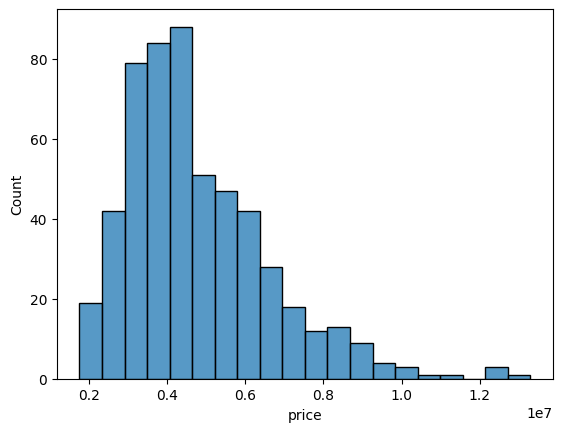

4


In [5]:
sns.histplot(data['price'], bins=20, kde=False)
plt.show()

print(max(data["bathrooms"]))


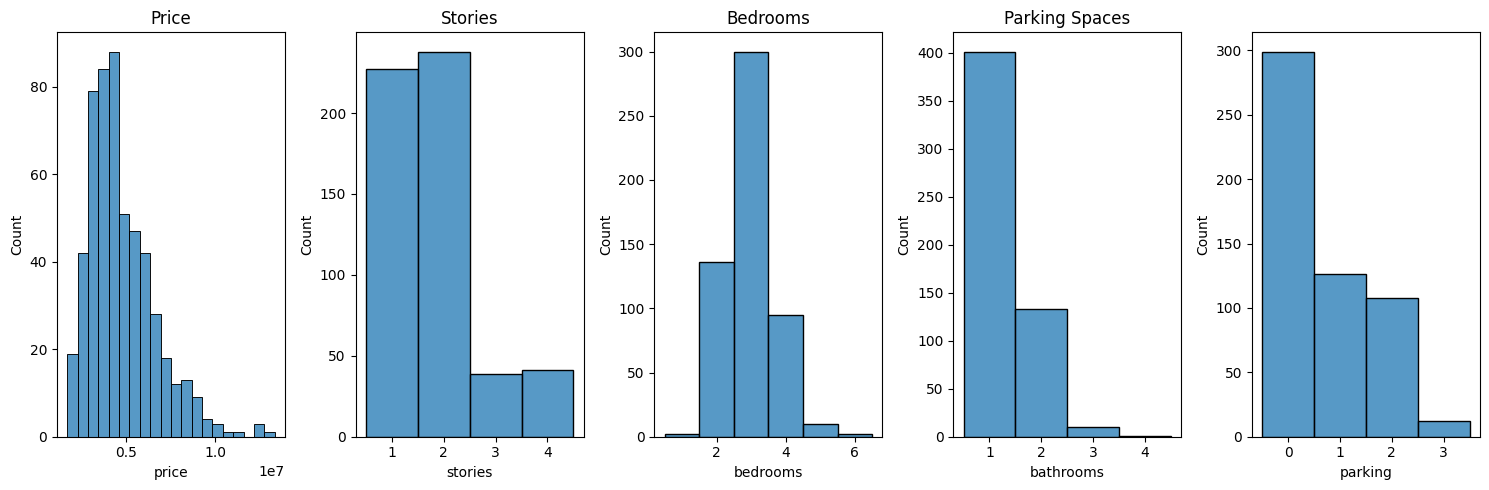

In [6]:
# Plot the Numerical data
fig, axs = plt.subplots(1, 5, figsize=(15, 5))  # figsize added for better visibility

sns.histplot(data['price'], bins=20, kde=False, ax=axs[0])
axs[0].set_title("Price")

sns.histplot(data['stories'], bins=6, kde=False, ax=axs[1], discrete=True)
axs[1].set_title("Stories")

sns.histplot(data['bedrooms'], bins=8, kde=False, ax=axs[2], discrete=True)
axs[2].set_title("Bedrooms")

sns.histplot(data['bathrooms'], bins=6, kde=False, ax=axs[3], discrete=True)
axs[3].set_title("Bathrooms")

sns.histplot(data['parking'], bins=6, kde=False, ax=axs[4], discrete=True)
axs[3].set_title("Parking Spaces")

fig.tight_layout()
plt.show()


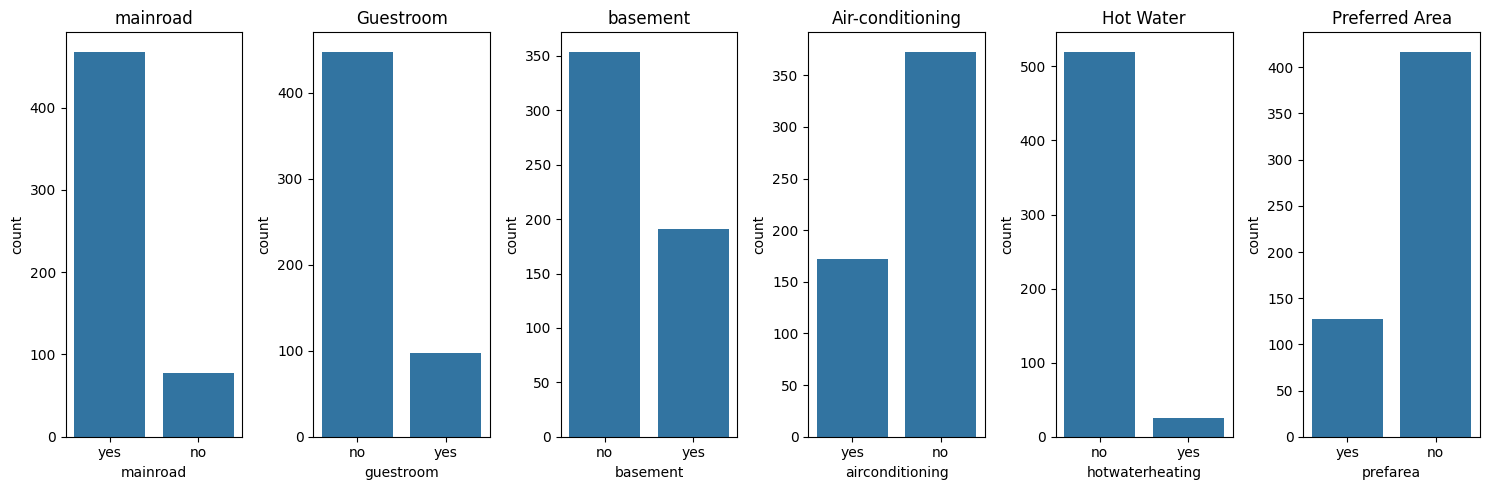

In [7]:
# Plot the categorical data
fig, axs = plt.subplots(1, 6, figsize=(15, 5))  # figsize added for better visibility

sns.countplot(x='mainroad', data=data, ax=axs[0])
axs[0].set_title("mainroad")

sns.countplot(x='guestroom', data=data, ax=axs[1])
axs[1].set_title("Guestroom")

sns.countplot(x='basement', data=data, ax=axs[2])
axs[2].set_title("basement")

sns.countplot(x='airconditioning', data=data, ax=axs[3])
axs[3].set_title("Air-conditioning")

sns.countplot(x='hotwaterheating', data=data, ax=axs[4])
axs[4].set_title("Hot Water")

sns.countplot(x='prefarea', data=data, ax=axs[5])
axs[5].set_title("Preferred Area")

fig.tight_layout()
plt.show()


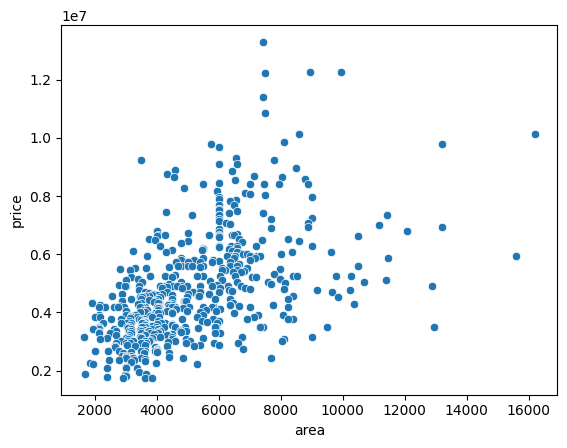

In [8]:
# Scatter shows a positive correlation between area and price 
sns.scatterplot(x='area', y='price', data=data)
plt.show()

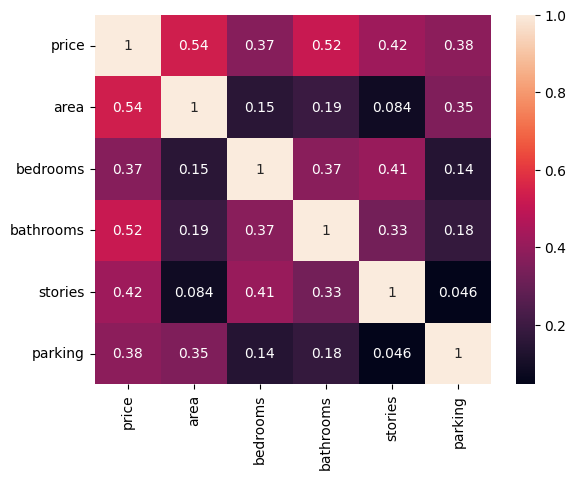

In [9]:
# Correlation matrix

numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


## Training regression models on the data

In [10]:
# The written data ie mainroad(yes/no) and prefarea(yes/no) need to be one-hot encoded to numeric values

# Performing one-hot encoding
data_encoded = pd.get_dummies(data, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)



# convert boolean values to 1 or 0 instead of True / False
data_encoded = data_encoded.astype({"mainroad_yes": int, "guestroom_yes": int, "basement_yes": int, "hotwaterheating_yes": int, "airconditioning_yes": int, "prefarea_yes": int, "furnishingstatus_semi-furnished": int, "furnishingstatus_unfurnished": int})
data_encoded.head()



,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

# Set features and targets

# X = data[['area', 'bedrooms', 'bathrooms']]  # Can write it all one or just drop the target column

X = data_encoded.drop("price", axis=1)

y = data_encoded['price']

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"| X_train size: {len(X_train)} | X_test size: {len(X_test)} | X_train size: {len(y_train)} | X_train size: {len(y_test)} | ")


| X_train size: 436 | X_test size: 109 | X_train size: 436 | X_train size: 109 | 


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Data type of X_train elements:", X_train.dtype)
print("Data type of y_train elements:", y_train.dtype)

print("X_train has NaN values:", np.isnan(X_train).any())
print("y_train has NaN values:", np.isnan(y_train).any())
print("X_train has Inf values:", np.isinf(X_train).any())
print("y_train has Inf values:", np.isinf(y_train).any())



In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor

linear_regressor = LinearRegression()
random_forrest_regressor = RandomForestRegressor()
elastic_net = ElasticNet()

linear_regressor.fit(X_train, y_train)
random_forrest_regressor.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

ElasticNet()

In [21]:
# Run predictions on test sets - these give a set of predicted price values based on the input features 

linear_prediction = linear_regressor.predict(X_test)
random_forrest_prediction = random_forrest_regressor.predict(X_test)
elastic_net_prediction = elastic_net.predict(X_test)

In [22]:
# import and run evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print(f"Linear Regression = MSE({mean_squared_error(y_true=y_test, y_pred=linear_prediction)}), MAE({mean_absolute_error(y_true=y_test, y_pred=linear_prediction)}), R2({r2_score(y_true=y_test, y_pred=linear_prediction)})")
print(f"Random Forrest Regression = MSE({mean_squared_error(y_true=y_test, y_pred=random_forrest_prediction)}), MAE({mean_absolute_error(y_true=y_test, y_pred=random_forrest_prediction)}), R2({r2_score(y_true=y_test, y_pred=random_forrest_prediction)})")
print(f"Elastic Net = MSE({mean_squared_error(y_true=y_test, y_pred=elastic_net_prediction)}), MAE({mean_absolute_error(y_true=y_test, y_pred=elastic_net_prediction)}), R2({r2_score(y_true=y_test, y_pred=elastic_net_prediction)})")


Linear Regression = MSE(1754318687330.668), MAE(970043.4039201643), R2(0.6529242642153176)
Random Forrest Regression = MSE(1942301284715.1775), MAE(1019856.0883792049), R2(0.6157336449891048)
Elastic Net = MSE(1993228920637.3289), MAE(1004041.6089634736), R2(0.6056580829848317)


## Neural Network Regressor

In [35]:
# neural_network = tf.keras.Sequential([tf.keras.layers.Dense(units = 1, input_shape = [13])])

# neural_network.compile(optimizer='adam', loss='mean_squared_error')

# Model definition as per required spec
neural_network_regressor = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[13])])

# Compiling the model
neural_network_regressor.compile(optimizer=tf.optimizers.SGD(), loss='mean_squared_error')

neural_network_regressor.fit(X_train, y_train, epochs=250)

Epoch 1/250
14/14 [==============================] - 0s 2ms/step - loss: 19702287958016.0000
Epoch 2/250
14/14 [==============================] - 0s 2ms/step - loss: 11289651838976.0000
Epoch 3/250
14/14 [==============================] - 0s 2ms/step - loss: 6751832244224.0000
Epoch 4/250
14/14 [==============================] - 0s 2ms/step - loss: 4244631977984.0000
Epoch 5/250
14/14 [==============================] - 0s 2ms/step - loss: 2830947319808.0000
Epoch 6/250
14/14 [==============================] - 0s 2ms/step - loss: 2024730132480.0000
Epoch 7/250
14/14 [==============================] - 0s 2ms/step - loss: 1576663908352.0000
Epoch 8/250
14/14 [==============================] - 0s 2ms/step - loss: 1320113537024.0000
Epoch 9/250
14/14 [==============================] - 0s 1ms/step - loss: 1171531235328.0000
Epoch 10/250
14/14 [==============================] - 0s 2ms/step - loss: 1091632431104.0000
Epoch 11/250
14/14 [==============================] - 0s 3ms/step - loss: 104

In [36]:
NN_pred = neural_network_regressor.predict(X_test)

4/4 [==============================] - 0s 0s/step


In [38]:
linear_prediction = linear_regressor.predict(X_test)
random_forrest_prediction = random_forrest_regressor.predict(X_test)
elastic_net_prediction = elastic_net.predict(X_test)
NN_pred = neural_network_regressor.predict(X_test)

print(f"Linear Regression = MSE({mean_squared_error(y_true=y_test, y_pred=linear_prediction)}), MAE({mean_absolute_error(y_true=y_test, y_pred=linear_prediction)}), R2({r2_score(y_true=y_test, y_pred=linear_prediction)})")
print(f"Random Forrest Regression = MSE({mean_squared_error(y_true=y_test, y_pred=random_forrest_prediction)}), MAE({mean_absolute_error(y_true=y_test, y_pred=random_forrest_prediction)}), R2({r2_score(y_true=y_test, y_pred=random_forrest_prediction)})")
print(f"Elastic Net = MSE({mean_squared_error(y_true=y_test, y_pred=elastic_net_prediction)}), MAE({mean_absolute_error(y_true=y_test, y_pred=elastic_net_prediction)}), R2({r2_score(y_true=y_test, y_pred=elastic_net_prediction)})")
print(f"Neural Network = MSE({mean_squared_error(y_true=y_test, y_pred=NN_pred)}), MAE({mean_absolute_error(y_true=y_test, y_pred=NN_pred)}), R2({r2_score(y_true=y_test, y_pred=NN_pred)})")

4/4 [==============================] - 0s 0s/step
Linear Regression = MSE(1754318687330.668), MAE(970043.4039201643), R2(0.6529242642153176)
Random Forrest Regression = MSE(1942301284715.1775), MAE(1019856.0883792049), R2(0.6157336449891048)
Elastic Net = MSE(1993228920637.3289), MAE(1004041.6089634736), R2(0.6056580829848317)
Neural Network = MSE(1766810339382.3682), MAE(971789.9678899082), R2(0.6504529063267421)


Results for Linear Regression : 
Mean Square Error : 1754318687330.668
Mean Absolute Error : 970043.4039201643
R2 Score : 0.6529242642153176


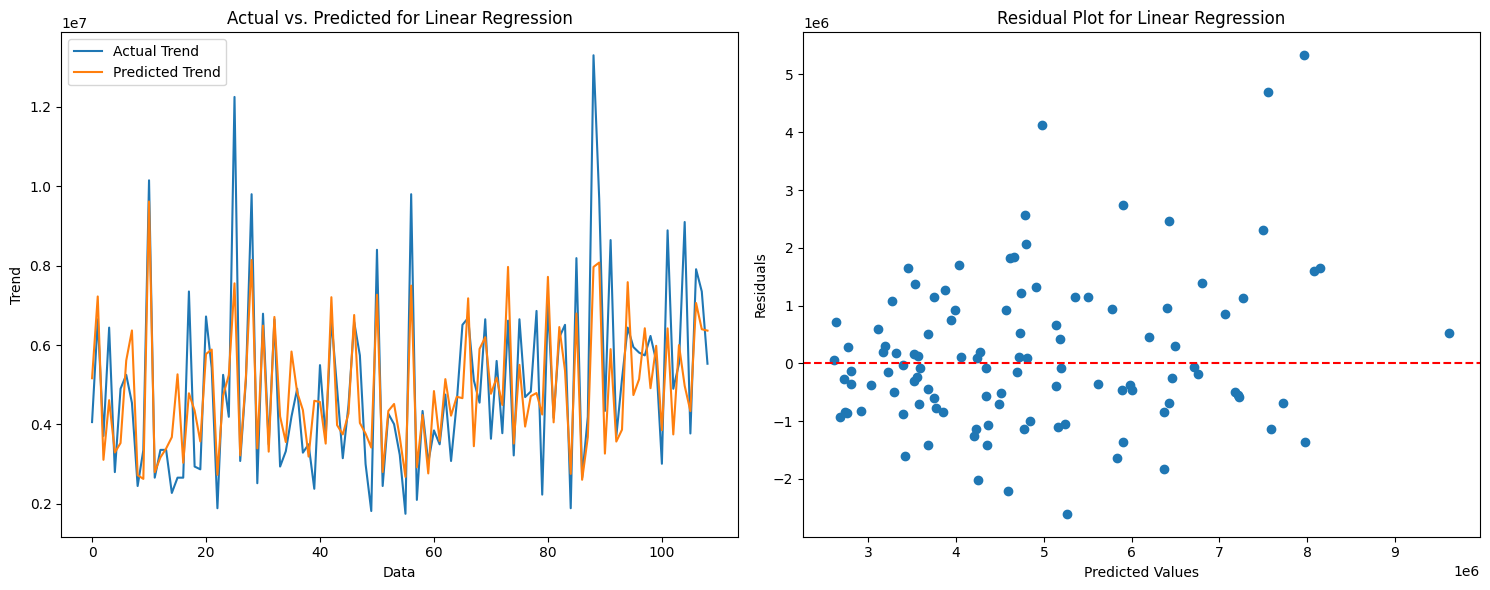

Results for Random Forrest Regression : 
Mean Square Error : 1942301284715.1775
Mean Absolute Error : 1019856.0883792049
R2 Score : 0.6157336449891048


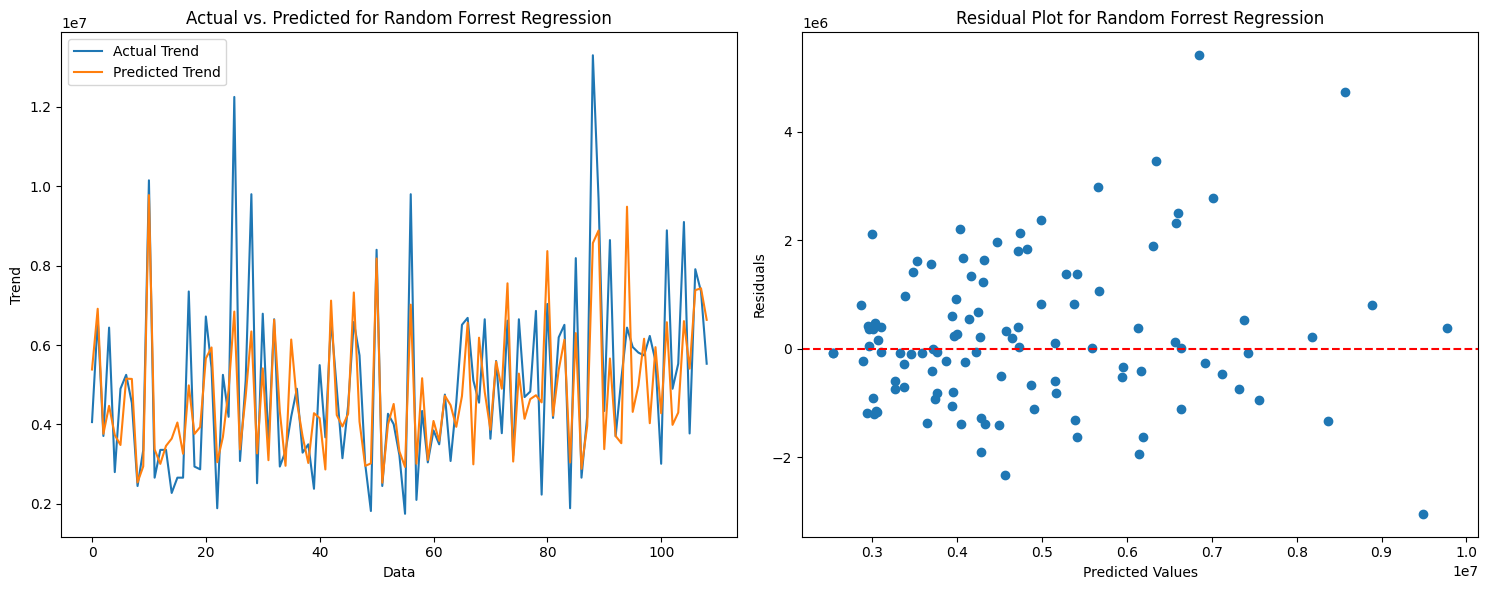

Results for Elastic Net : 
Mean Square Error : 1993228920637.3289
Mean Absolute Error : 1004041.6089634736
R2 Score : 0.6056580829848317


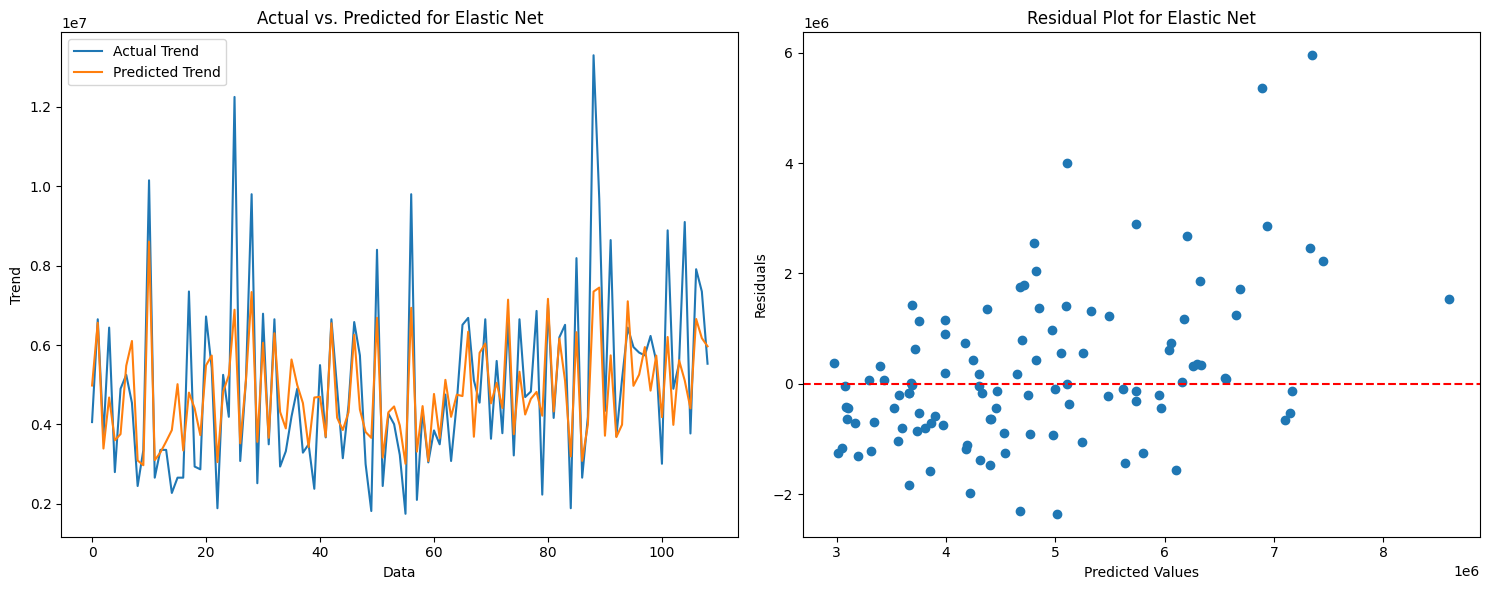

Results for Neural Network : 
Mean Square Error : 1766810339382.3682
Mean Absolute Error : 971789.9678899082
R2 Score : 0.6504529063267421


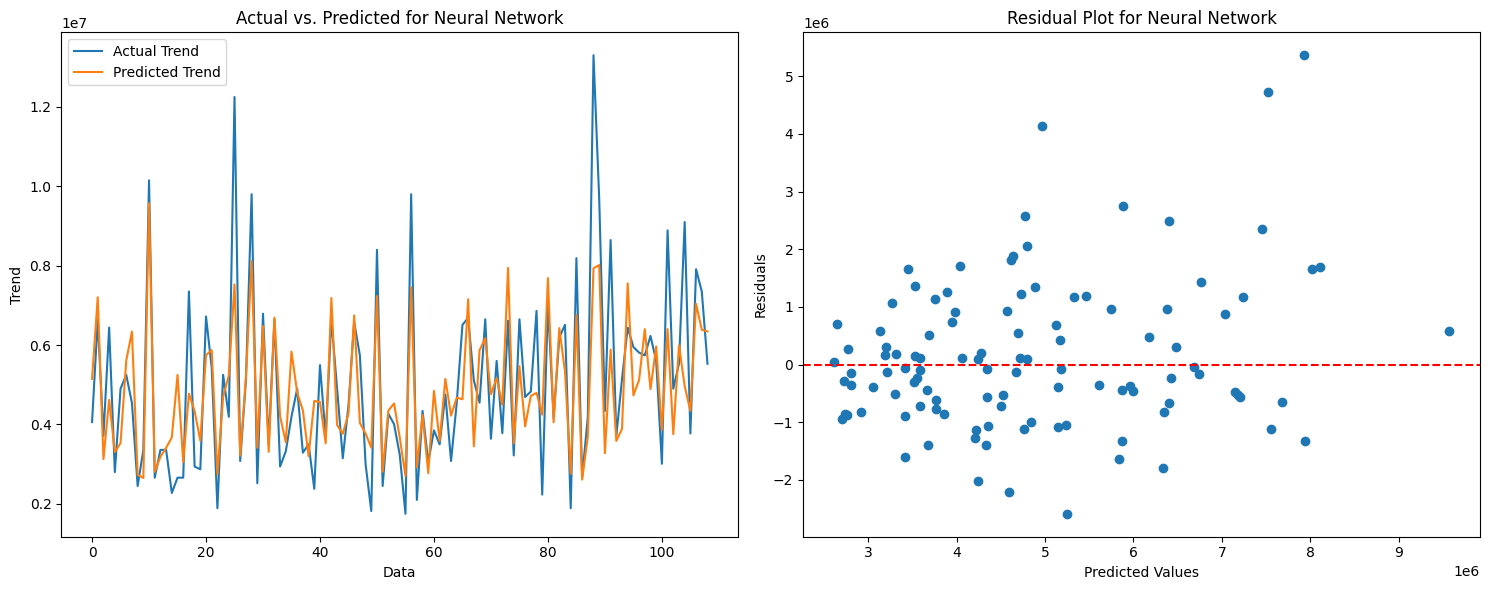

In [41]:
# Store predictions in a dictionary
predictions = {
    'Linear Regression': linear_prediction,
    'Random Forrest Regression': random_forrest_prediction,
    'Elastic Net': elastic_net_prediction,
    'Neural Network': NN_pred
}

# Initialize dictionary to store evaluation metrics
acc = {}

# Loop through the dictionary to evaluate and plot
for name, y_pred in predictions.items():
    # Reshape y_pred if it is a 2D array with shape (n, 1)
    if y_pred.ndim == 2 and y_pred.shape[1] == 1:
        y_pred = y_pred.reshape(-1)
        
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    
    print(f"Results for {name} : ")
    print(f"Mean Square Error : {mse}")
    print(f"Mean Absolute Error : {mae}")
    print(f"R2 Score : {r2}")

    plt.figure(figsize=(15, 6))

    # Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title(f'Actual vs. Predicted for {name}')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {name}')

    plt.tight_layout()
    plt.show()

Results for Linear Regression : 
Mean Square Error : 1754318687330.668
Mean Absolute Error : 970043.4039201643
R2 Score : 0.6529242642153176
Results for Random Forrest Regression : 
Mean Square Error : 1942301284715.1775
Mean Absolute Error : 1019856.0883792049
R2 Score : 0.6157336449891048
Results for Elastic Net : 
Mean Square Error : 1993228920637.3289
Mean Absolute Error : 1004041.6089634736
R2 Score : 0.6056580829848317
Results for Neural Network : 
Mean Square Error : 1766810339382.3682
Mean Absolute Error : 971789.9678899082
R2 Score : 0.6504529063267421


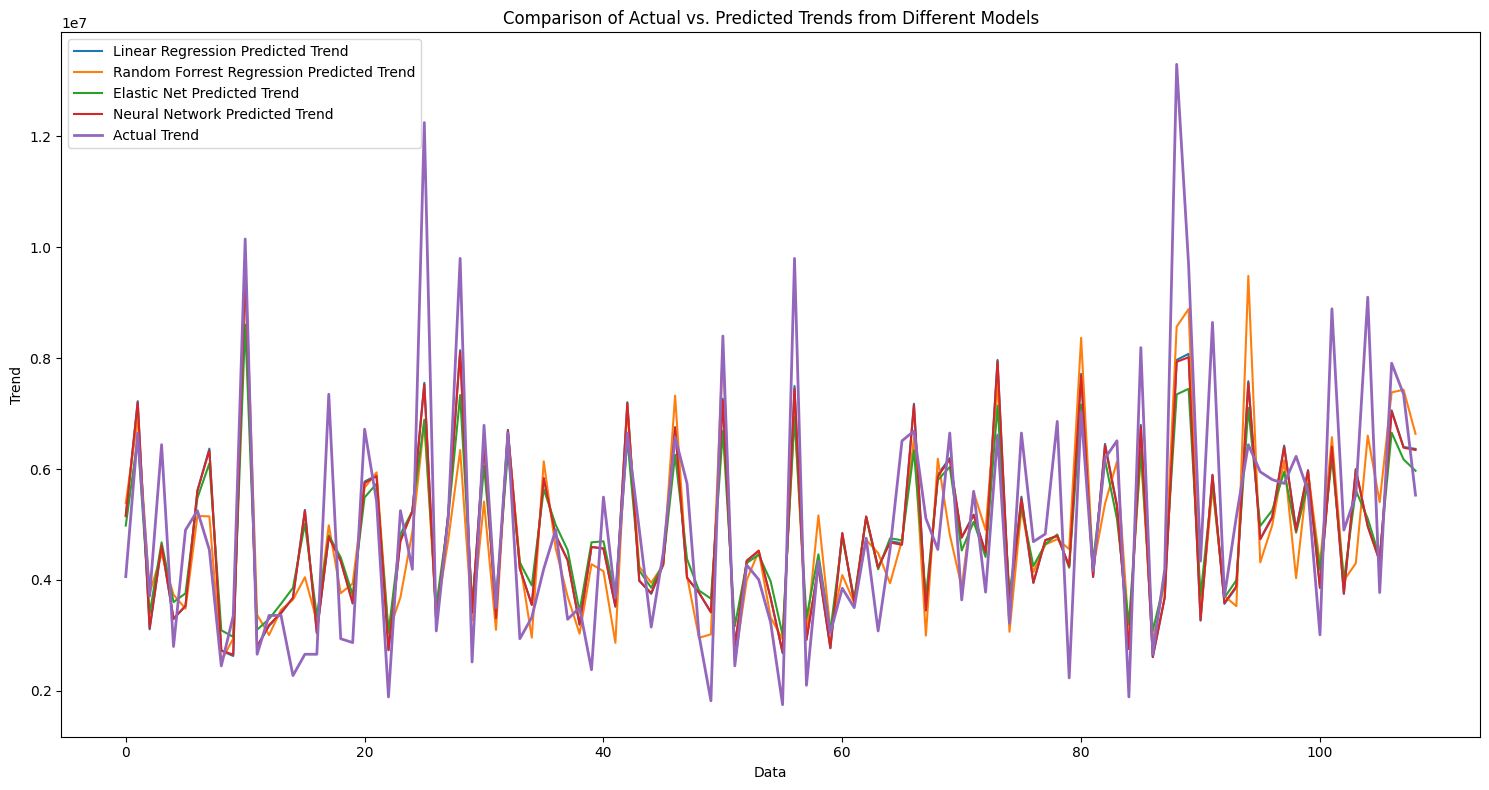

In [42]:
# Initialize a figure for the combined plot
plt.figure(figsize=(15, 8))

# Loop through the dictionary to evaluate and plot
for name, y_pred in predictions.items():
    if y_pred.ndim == 2 and y_pred.shape[1] == 1:
        y_pred = y_pred.reshape(-1)
        
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    
    print(f"Results for {name} : ")
    print(f"Mean Square Error : {mse}")
    print(f"Mean Absolute Error : {mae}")
    print(f"R2 Score : {r2}")

    # Add to the combined plot
    plt.plot(np.arange(len(y_test)), y_pred, label=f'{name} Predicted Trend')

plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend', linewidth=2)

plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Comparison of Actual vs. Predicted Trends from Different Models')

plt.tight_layout()
plt.show()
